<a href="https://colab.research.google.com/github/mohsina680/BuildablesDataScienceFellowship/blob/main/Task11_DS_FellowShip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

In [16]:
#load dataset
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
#shape of DataSet
df.shape

(100000, 9)

In [15]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape of dataset: (100000, 9)

Missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Data types:
 gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [17]:
# 2. Data Preprocessing

num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Encode categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Features & Target
target_col = 'diabetes'   # adjust if dataset has 'Outcome'
X = df.drop(target_col, axis=1)
y = df[target_col]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [24]:
# Using Logistic Regression

log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

print("\n- Using Logistic Regression")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_log))
print("F1-Score :", f1_score(y_test, y_pred_log))


- Using Logistic Regression
Accuracy : 0.9605
Precision: 0.8593996840442338
Recall   : 0.64
ROC-AUC  : 0.962537881710061
F1-Score : 0.7336480107889414


In [21]:
# Using Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=6)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\n- Using Decision Tree")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1-Score :", f1_score(y_test, y_pred_dt))


- Using Decision Tree
Accuracy : 0.9723
Precision: 1.0
Recall   : 0.6741176470588235
F1-Score : 0.8053408292340126


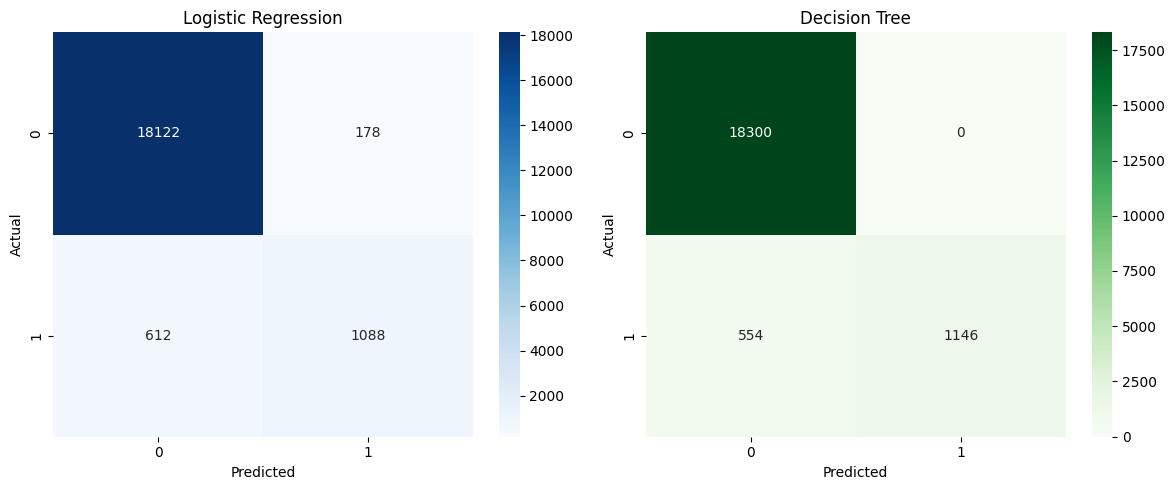

In [22]:
# Confusion Matrices

cm_log = confusion_matrix(y_test, y_pred_log)
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

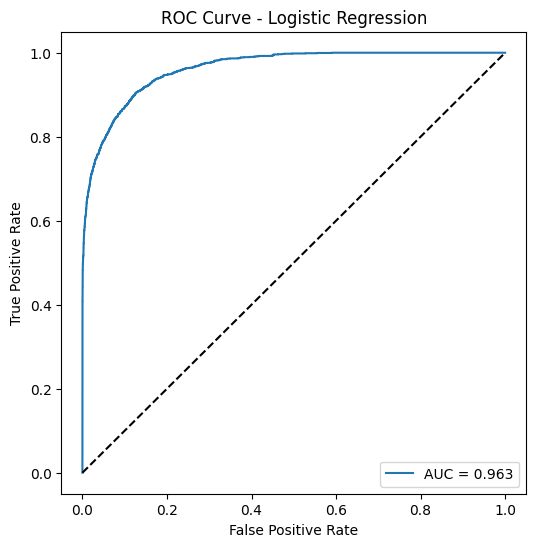

In [23]:
# ROC Curve for Logistic Regression

fpr, tpr, _ = roc_curve(y_test, y_prob_log)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob_log):.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

**The logestic regression will be better for predictions, according to our dataSet and it's requirements**